In [1]:
from pathlib import Path
# import json

import pandas as pd
import anndata as ad
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load abc atlas data

In [2]:
abc_root = Path("/data/abc_atlas/")
brain_id = 'C57BL6J-638850'
version = '20230830'

In [3]:
# load expression matrix for log2 counts
adata_log2 = ad.read_h5ad(abc_root/f"expression_matrices/MERFISH-{brain_id}/{version}/{brain_id}-log2.h5ad", backed='r')

In [4]:
# load in the cell metadata
gene_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/gene.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [5]:
# load in the cell metadata
cell_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/cell_metadata.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [6]:
# load in the _cluster_annotation metadata csv
cluster_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/views/cell_metadata_with_cluster_annotation.csv', 
                            dtype={'cell_label':str},
                            index_col=0)

In [7]:
# load in the _parcellation_annotation metadata csv
ccf_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv', 
                        dtype={'cell_label':str},
                        index_col=0)

# # flip y coords so the sections don't display upside down
# flip_y=True
# if flip_y:
#     ccf_md_df[['y_section', 'y_reconstructed']] *= -1

# What's in each metadata file?

## expression matrices (log2 & raw) h5ad

- 4,334,174 cells (~4.3 million)

In [8]:
print(f'{adata_log2.n_obs=}')
adata_log2

adata_log2.n_obs=4334174


AnnData object with n_obs × n_vars = 4334174 × 550 backed at '/data/abc_atlas/expression_matrices/MERFISH-C57BL6J-638850/20230830/C57BL6J-638850-log2.h5ad'
    obs: 'brain_section_label'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src'

## gene.csv metadata

In [9]:
print(f'{len(gene_md_df)=}')
gene_md_df

len(gene_md_df)=550


,gene_symbol,transcript_identifier,name,mapped_ncbi_identifier
gene_identifier,,,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118,"protein kinase C, theta",NCBIGene:18761
ENSMUSG00000026837,Col5a1,ENSMUST00000028280,"collagen, type V, alpha 1",NCBIGene:12831
ENSMUSG00000001985,Grik3,ENSMUST00000030676,"glutamate receptor, ionotropic, kainate 3",NCBIGene:14807
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328,insulin-like growth factor binding protein 2,NCBIGene:16008
ENSMUSG00000048387,Osr1,ENSMUST00000057021,odd-skipped related transcription factor 1,NCBIGene:23967
...,...,...,...,...
Blank-33,Blank-33,Blank-33,NaN,NaN
Blank-34,Blank-34,Blank-34,NaN,NaN
Blank-45,Blank-45,Blank-45,NaN,NaN


## cell_metadata.csv

In [14]:
print(f'{len(cell_md_df)=}')
cell_md_df.head(5)

len(cell_md_df)=3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z
cell_label,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4


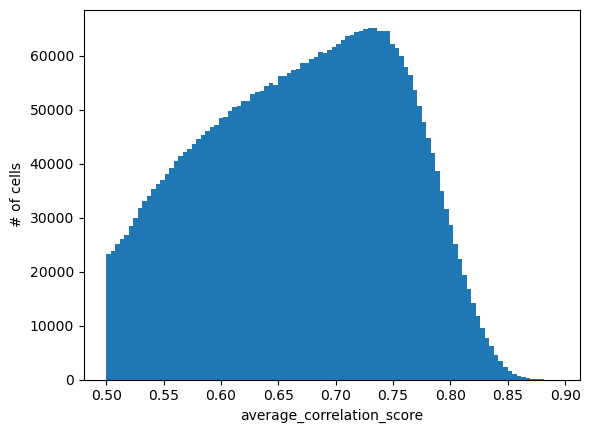

In [19]:
# counts, bins = np.histogram(cell_md_df['average_correlation_score'].values)
fig = plt.figure()
ax = plt.gca()
ax.hist(cell_md_df['average_correlation_score'].values, bins=100)
ax.set_xlabel('average_correlation_score')
ax.set_ylabel('# of cells')
plt.show()

In [12]:
print(f'{len(ccf_md_df)=}')
ccf_md_df

len(ccf_md_df)=3739961


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,brain,grey,HPF,DG,DG-po,#FFFFFF,#BFDAE3,#7ED04B,#7ED04B,#7ED04B
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,brain,grey,P,TRN,TRN,#FFFFFF,#BFDAE3,#FF9B88,#FFBA86,#FFBA86
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,brain,fiber tracts,cbf,arb,arb,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,...,brain,grey,Isocortex,SSp-n,SSp-n2/3,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,...,brain,grey,Isocortex,ACAd,ACAd5,#FFFFFF,#BFDAE3,#70FF71,#40A666,#40A666
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,...,brain,grey,Isocortex,SSp-m,SSp-m6a,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
